## Regularize Linear Regression
---

Regularization is a technique used in an attempt to solve the overfitting problem in statistical models.

The regularization technique comes handy. You penalize your loss function by adding a multiple of an L1 (LASSO) or an L2 (Ridge) norm of your weights vector w (it is the vector of the learned parameters in your linear regression). 

**High bias or underfitting** is when the form of our hypothesis function $h$ maps poorly to the trend of the data. It is usually caused by a function that is too simple or uses too few features. eg. if we take $h_\theta(x)= \theta _{0}+\theta _{1}x+\theta _{2}x$  then we are making an initial assumption that a linear model will fit the training data well and will be able to generalize but that may not be the case.

At the other extreme, **overfitting or high variance** is caused by a hypothesis function that fits the available data but does not generalize well to predict new data. It is usually caused by a complicated function that creates a lot of unnecessary curves and angles unrelated to the data.

This terminology is applied to both linear and logistic regression.

There are two main options to address the issue of overfitting:

1. Reduce the number of features.
    - Manually select which features to keep.
    - Use a model selection algorithm (studied later in the course).
    
2. Regularization
    - Keep all the features, but reduce the parameters $θ_j$.


Regularization works well when we have a lot of slightly useful features.

---
Regularization
---

In general, a regularization term $R(f)$ is introduced to a general loss function:

$\min _{f}\sum _{i=1}^{n}V(f({\hat {x}}_{i}),{\hat {y}}_{i})+\lambda R(f)$

for a loss function $V$ that describes the cost of predicting $f(x)$ when the label is $y$, such as the square loss or hinge loss, and for the term $\lambda$ which controls the importance of the regularization term. $R(f)$ is typically a penalty on the complexity of $f$, such as restrictions for smoothness or bounds on the vector space norm.

A theoretical justification for regularization is that it attempts to impose Occam's razor on the solution, as depicted in the figure. From a Bayesian point of view, many regularization techniques correspond to imposing certain prior distributions on model parameters.

Regularization can be used to learn simpler models, induce models to be sparse, introduce group structure into the learning problem, and more.

The same idea arose in many fields of science. For example, the least-squares method can be viewed as a very simple form of regularization. A simple form of regularization applied to integral equations, generally termed Tikhonov regularization after Andrey Nikolayevich Tikhonov, is essentially a trade-off between fitting the data and reducing a norm of the solution. More recently, non-linear regularization methods, including total variation regularization have become popular.

---
Cost Function - Square Errors
---

If we have overfitting from our hypothesis function, we can reduce the weight that some of the terms in our function carry by increasing their cost.

Say we wanted to make the following hypothesis function more quadratic:

from: 12_Exploratory_Data_Analysis_EDA

$y_{i}=\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}=\mathbf {x} _{i}^{\rm {T}}{\boldsymbol {\beta }}+\varepsilon _{i},\qquad i=1,\ldots ,n,$


$y_{i}=\hat{y}=\mathbf {x} _{i}^{\rm {T}}{\boldsymbol {\beta }}+\varepsilon _{i},\qquad$


$\mathbf {y} =\mathbf {X} {\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }},\,$


Then:


Estimate the parameter vector $\theta$. The most common method is least squares regression. We find the parameter values which minimize the sum of squared residuals


$h_\theta(x)= \theta _{0}+\theta _{1}x+\theta _{2}x+\theta _{3}x+\theta _{4}x + {\varepsilon } = y$

$h_\theta(x) = X\theta + \epsilon$


**Least Square Criterion**

$\min \sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $ 


where:

$SS_\text{res}=\sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $  The sum of squares of residuals, also called the residual sum of squares


Of course we still need a method to estimate the parameter vector \beta. The most common method is least squares regression. We find the parameter values which minimize the sum of squared residuals


$SSR =  \sum _{i=1}^{m}{\bigl |}y_{i}-\sum _{j=1}^{n}X_{ij}\theta _{j}{\bigr |}^{2}={\bigl \|}\mathbf {y} -\mathbf {X} {\boldsymbol {\theta }}{\bigr \|}^{2}$

The solution turns out to be a matrix equation:

$\hat{\boldsymbol\theta} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$


where, cost function (square error):

$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)^2 $

and

Ridge cost function = $\sum_i (y_i - \hat{Y_i})^2 + \lambda\sum _{j=1}^{p} |\theta _{j}|_{}^{2}$

when the goal is to:

$ \min_{\theta} J(\theta) $


We could also regularize all of our theta parameters in a single summation:



$ \min_{\theta} \frac{1}{2m}[\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)^2 + \lambda\sum _{j=1}^{n} {\theta _{j}}_{}^{2}] $


The λ, or lambda, is the regularization parameter. It determines how much the costs of our theta parameters are inflated.

The second term here is the shrinkage penalty. Lambda here is an example of a tuning parameter. Determine the best value of lambda via cross validation.

Using the above cost function with the extra summation, we can smooth the output of our hypothesis function to reduce overfitting. If lambda is chosen to be too large, it may smooth out the function too much and cause underfitting.

Using the above cost function with the extra summation, we can smooth the output of our hypothesis function to reduce overfitting. If lambda is chosen to be too large, it may smooth out the function too much and cause underfitting.

---
Ridge - Tikhonov regularization 
---

**Ridge Regularization is also called L2 Regularization since it uses the L2 norm**


When learning a linear function, such that $f(x)=w\cdot x$, the $ L_{2}$ norm loss corresponds to Tikhonov regularization. This is one of the most common forms of regularization, is also known as **ridge regression**, and is expressed as:

$\min _{w}\sum _{i=1}^{n}V({\hat {x}}_{i}\cdot w,{\hat {y}}_{i})+\lambda \|w\|_{2}^{2}$


Suppose that for a known matrix $A$ and vector $b$, we wish to find a vector ${x}$ such that



$A\mathbf {x} =\mathbf {b}$


$\begin{pmatrix} a_{11} & \cdots & a_{1p} \\
 a_{21} & \cdots & a_{2p} \\
 \vdots & \ddots & \vdots \\
 a_{n1} & \cdots & a_{np}
 \end{pmatrix}. \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}\quad =  \begin{pmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{pmatrix} \quad$

The standard approach is ordinary least squares linear regression. However, if no $x$ satisfies the equation or more than one $x$ does—that is the solution is not unique—the problem is said not to be well posed. In such cases, ordinary least squares estimation leads to an overdetermined (over-fitted), or more often an underdetermined (under-fitted) system of equations. Most real-world phenomena have the effect of low-pass filters in the forward direction where $A$ maps $\mathbf {x}$ to $\mathbf {b} $. Therefore, in solving the inverse-problem, the inverse mapping operates as a high-pass filter that has the undesirable tendency of amplifying noise (eigenvalues / singular values are largest in the reverse mapping where they were smallest in the forward mapping). In addition, ordinary least squares implicitly nullifies every element of the reconstructed version of $ \mathbf {x}$ that is in the null-space of $A$, rather than allowing for a model to be used as a prior for $\mathbf {x}$ . 

$\|A\mathbf {x} -\mathbf {b} \|^{2}$

where $∥ ⋅ ∥ $ is the Euclidean norm. In order to give preference to a particular solution with desirable properties, a regularization term can be included in this minimization:

$\|A\mathbf {x} -\mathbf {b} \|^{2}+\|\Gamma \mathbf {x} \|^{2}$

for some suitably chosen Tikhonov matrix, $\Gamma$ . In many cases, this matrix is chosen as a multiple of the identity matrix ( $\Gamma =\alpha I$), giving preference to solutions with smaller norms; this is known as **L2 regularization**.


**Tikhonov regularized least squares**

The learning problem with the least squares loss function and Tikhonov regularization can be solved analytically. Written in matrix form, the optimal $w$ will be the one for which the gradient of the loss function with respect to $w$ at $0$.

$\min _{w}{\frac {1}{n}}({\hat {X}}w-{\hat {Y}})^{2}+\lambda \|w\|_{2}^{2}$

${\displaystyle \nabla _{w}={\frac {2}{n}}{\hat {X}}^{T}({\hat {X}}w-{\hat {Y}})+2\lambda w}   \leftarrow \text{This is the first-order condition for this optimization problem}$

$0={\hat {X}}^{T}({\hat {X}}w-{\hat {Y}})+n\lambda w$

$w=({\hat {X}}^{T}{\hat {X}}+\lambda nI)^{-1}({\hat {X}}^{T}{\hat {Y}})$

By construction of the optimization problem, other values of $ w$ would give larger values for the loss function. This could be verified by examining the second derivative ${\displaystyle \nabla _{ww}}$.

**Ridge regression**

One particularly common choice for the penalty function $R$ is the squared $\ell _{2} norm$, i.e.,

$R(w)=\sum _{j=1}^{d}w_{j}^{2}$


${\displaystyle {\frac {1}{n}}\|Y-\operatorname {X} w\|_{2}^{2}+\lambda \sum _{j=1}^{d}|w_{j}|^{2}\rightarrow \min _{w\in \mathbf {R^{d}} }} $

The most common names for this are called Tikhonov regularization and ridge regression. It admits a closed-form solution for $ w$:

from the linear matrix equation:

$\hat{\boldsymbol\theta} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$


$w=(X^{T}X+\alpha I)^{-1}X^{T}Y$

The name ridge regression alludes to the fact that the $ {\displaystyle \alpha I}$ term adds positive entries along the diagonal "ridge" of the sample covariance matrix $X^{T}X$.


When $\alpha =0$, i.e., in the case of ordinary least squares, the condition that ${\displaystyle d>n}$ causes the sample covariance matrix $X^{T}X$ to not have full rank and so it cannot be inverted to yield a unique solution. This is why there can be an infinitude of solutions to the ordinary least squares problem when $ {\displaystyle d>n}$. However, when $\alpha >0$, i.e., when ridge regression is used, the addition of ${\displaystyle \alpha I}$ to the sample covariance matrix ensures that all of its eigenvalues will be strictly greater than $0$. In other words, it becomes invertible, and the solution becomes unique.

Compared to ordinary least squares, ridge regression is not unbiased. It accepts little bias to reduce variance and the mean square error, and helps to improve the prediction accuracy. Thus, ridge estimator yields more stable solutions by shrinking coefficients but suffers from the lack of sensitivity to the data.


During training, this algorithm takes $O(d^{3}+nd^{2})$ time. The terms correspond to the matrix inversion and calculating $X^{T}X$, respectively. Testing takes $O(nd)$ time.

Ridge cost function = $\sum_i (y_i - \hat{Y_i})^2 + \lambda\sum _{j=1}^{p} |\theta _{j}|_{}^{2}$

* If we increase lambda, the variance will decrease and the bias will increase.
* Lambda=0 is the same as standard Linear Regression.

Squaring the error is nice for differentiability purposes, but it might be too harsh of a penalty. This leads us to *Lasso*.

---
Covariance matrix - $X^{T}X$
---

In probability theory and statistics, a covariance matrix (also known as dispersion matrix or variance–covariance matrix) is a matrix whose element in the i, j position is the covariance between the i th and j th elements of a random vector. 

The covariance matrix captures the variance and linear correlation in multivariate/multidimensional data.

If data is an N * D matrix the covariance matrix is a d * d square matrix
where: 

N:are rows

D: Attributes


http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

---
Lasso regularization
---

In statistics and machine learning, lasso (least absolute shrinkage and selection operator) (also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

Lasso was originally formulated for least squares models and this simple case reveals a substantial amount about the behavior of the estimator, including its relationship to ridge regression and best subset selection and the connections between lasso coefficient estimates and so-called soft thresholding. It also reveals that (like standard linear regression) the coefficient estimates need not be unique if covariates are collinear.

Though originally defined for least squares, lasso regularization is easily extended to a wide variety of statistical models including generalized linear models, generalized estimating equations, proportional hazards models, and M-estimators, in a straightforward fashion. Lasso’s ability to perform subset selection relies on the form of the constraint and has a variety of interpretations including in terms of geometry, Bayesian statistics, and convex analysis.

Ridge regression improves prediction error by shrinking large regression coefficients in order to reduce overfitting, but it does not perform covariate selection and therefore does not help to make the model more interpretable.

Lasso is able to achieve both of these goals by forcing the sum of the absolute value of the regression coefficients to be less than a fixed value, which forces certain coefficients to be set to zero, effectively choosing a simpler model that does not include those coefficients. This idea is similar to ridge regression, in which the sum of the squares of the coefficients is forced to be less than a fixed value, though in the case of ridge regression, this only shrinks the size of the coefficients, it does not set any of them to zero.

Consider a sample consisting of $N$ cases, each of which consists of p covariates and a single outcome. Let $y_{i}$ be the outcome and ${\displaystyle x_{i}:=(x_{1},x_{2},\ldots ,x_{p})^{T}}$ be the covariate vector for the ith case. Then the objective of lasso is to solve

$\min _{\beta _{0},\beta }\left\{{\frac {1}{N}}\sum _{i=1}^{N}(y_{i}-\beta _{0}-x_{i}^{T}\beta )^{2}\right\}{\text{ subject to }}\sum _{j=1}^{p}|\beta _{j}|\leq t.$

Here $t$ is a prespecified free parameter that determines the amount of regularisation. Letting $X$ be the covariate matrix, so that ${\displaystyle X_{ij}=(x_{i})_{j}}$ and ${\displaystyle x_{i}^{T}}$ is the ith row of $X$, we can write this more compactly as

${\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{N}}\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}{\text{ subject to }}\|\beta \|_{1}\leq t.}$

where ${\displaystyle \|Z\|_{p}=\left(\sum _{i=1}^{N}|Z_{i}|^{p}\right)^{1/p}}$ is the standard ${\displaystyle \ell ^{p}}$ norm.

Since ${\displaystyle {\hat {\beta }}_{0}={\bar {y}}-{\bar {x}}^{T}\beta }$, so that

${\displaystyle y_{i}-{\hat {\beta }}_{0}-x_{i}^{T}\beta =y_{i}-({\bar {y}}-{\bar {x}}^{T}\beta )-x_{i}^{T}\beta =(y_{i}-{\bar {y}})-(x_{i}-{\bar {x}})^{T}\beta ,}$

it is standard to work with centered variables. Additionally, the covariates are typically standardized ${\displaystyle \textstyle \left(\sum _{i=1}^{N}x_{ij}^{2}=1\right)}$ so that the solution does not depend on the measurement scale.

It can be helpful to rewrite

${\displaystyle \min _{\beta \in \mathbb {R} ^{p}}\left\{{\frac {1}{N}}\left\|y-X\beta \right\|_{2}^{2}\right\}{\text{ subject to }}\|\beta \|_{1}\leq t.}$

in the so-called Lagrangian form

${\displaystyle \min _{\beta \in \mathbb {R} ^{p}}\left\{{\frac {1}{N}}\left\|y-X\beta \right\|_{2}^{2}+\lambda \|\beta \|_{1}\right\}}$

where the exact relationship between $t$ and $\lambda $is data dependent.



The $L_{1}$ norm can be used to approximate the optimal $L_{0}$ norm via convex relaxation. It can be shown that the $ L_{1}$ norm induces sparsity. In the case of least squares, this problem is known as LASSO in statistics and basis pursuit in signal processing.

$\min _{w\in \mathbb {R} ^{p}}{\frac {1}{n}}\|{\hat {X}}w-{\hat {Y}}\|^{2}+\lambda \|w\|_{1}$ 

**Interpretations of lasso**

https://en.wikipedia.org/wiki/Lasso_(statistics)#/media/File:L1_and_L2_balls.jpg


As discussed above, lasso can set coefficients to zero, while ridge regression, which appears superficially similar, cannot. **This is due to the difference in the shape of the constraint boundaries in the two cases**. Both lasso and ridge regression can be interpreted as minimizing the same objective function

$\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{N}}\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}$

but with respect to different constraints: ${\displaystyle \|\beta \|_{1}\leq t}$ for lasso and ${\displaystyle \|\beta \|_{2}^{2}\leq t}$ for ridge.


























---
Lasso vs Ridge
---

A key difference between Lasso and Ridge is that with Lasso, some of the coefficients will go to 0, while with Ridge, they will just get small.

This property often makes Lasso appealing, since we will actually remove features rather than just having some features with small beta coefficients.


An important difference between lasso regression and Tikhonov regularization is that lasso regression forces more entries of $w$ to actually equal $0$ than would otherwise. In contrast, while Tikhonov regularization forces entries of $ w$ to be small, it does not force more of them to be $0$ than would be otherwise. Thus, LASSO regularization is more appropriate than Tikhonov regularization in cases in which we expect the number of non-zero entries of $w$ to be small, and Tikhonov regularization is more appropriate when we expect that entries of $w$ will generally be small but not necessarily zero. Which of these regimes is more relevant depends on the specific data set at hand.

Besides feature selection described above, LASSO has some limitations. Ridge regression provides better accuracy in the case ${\displaystyle n>d}$ for highly correlated variables. In another case, $ {\displaystyle n<d}$, LASSO selects at most $ {\displaystyle n}$ variables. Moreover, LASSO tends to select some arbitrary variables from group of highly correlated samples, so there is no grouping effect.

---
How can I tune in the regularization term λ?
---


One possible answer is to use Cross-validation: you divide your training data, you train your model for a fixed value of λ and test it on the remaining subsets and repeat this procedure while varying λ. Then you select the best λ that minimizes your loss function.

One approach you can take is to randomly subsample your data a number of times and look at the variation in your estimate. Then repeat the process for a slightly larger value of lambda to see how it affects the variability of your estimate.

The cross validation described above is a method used often in Machine Learning. However, choosing a reliable and safe regularization parameter is still a in research in mathematics.

---

Lasso and ridge regression are two alternatives – or should I say complements – to ordinary least squares (OLS). They both start with the standard OLS form and add a penalty for model complexity. The only difference between the two methods is the form of the penality term. Ridge regression uses the $\mathbf{\mathit{l}_{2}}-norm$ while lasso regression uses the $\mathbf{\mathit{l}_{1}}-norm$. Specifically the forms are shown below


$ SS_\text{res}=\sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $  The sum of squares of residuals, also called the residual sum of squares

where $ \hat{Y_i} =  (\sum _{j=1}^{p}x_{i}^{T}\hat\beta _{j}) $


** Lasso Regression: for linear regression** 

$ \mathbf{\hat{\beta}^{lasso} = \displaystyle arg\min_{\beta}\sum^{n}_{i=1}(y_{i}-\sum _{j=1}^{p}x_{i}^{T}\beta _{j} )^2 + \lambda\sum _{j=1}^{p}|\beta _{j}|}$


**Ridge Regression: for linear regression **

$\mathbf{\hat{\beta}^{ridge} = \displaystyle arg\min_{\beta}\sum^{n}_{i=1}(y_{i}-\sum _{j=1}^{p}x_{i}^{T}\beta _{j})^2 + \lambda\sum _{j=1}^{p} |\beta _{j}|_{}^{2}}$


L2-Ridge regularization is used in many contexts aside from linear regression, such as classification with logistic regression or support vector machines, and matrix factorization

With lasso, a coefficient estimates shrink to $0$ when the absolute value of that least squares coefficient is less than $λ/2$ (and so you also get feature selection from lasso).

With ridge, least squares coefficients shrink, but are left in the model (so no feature selection); coefficients are only $0$ if $λ$ is $\infty$.


The "secret" is in the regularization term. Minimizing $f = xb + |b|$ will shrink some b's to 0. When the regularization term becomes $|b^2|$, with $b<1$, it will be even smaller. Hence minimizing f will tend not to shrink to zero any b.

The regularization of the ridge is a shrinkage: the coefficients learned are shrunk towards zero.

The amount of regularization is set via the alpha parameter of the ridge, which is tunable. We'll use the Ridge class to start, but the RidgeCV class in scikits-learn automatically tunes this parameter via cross-validation.

In [2]:
from sklearn.datasets import load_diabetes


from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn import preprocessing


import sklearn
import statsmodels.api as sm
import sklearn.linear_model as LM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 6)
%matplotlib inline




** Dataset : Diabetes **

In [3]:
diabetes = load_diabetes()
X = diabetes.data # Features
X[:2]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405]])

In [4]:
y = diabetes.target # Target
y[:2]

array([ 151.,   75.])

---
Ridge
---

**Ridge Regression: **

$\mathbf{\hat{\beta}^{ridge} = \displaystyle arg\min_{\beta}\sum^{n}_{i=1}(y_{i}-\beta _{0}-\sum _{j=1}^{p}x_{i}^{T}\beta _{j})^2 + \lambda\sum _{j=1}^{p} |\beta _{j}|_{}^{2}}$


L2 regularization is used in many contexts aside from linear regression, such as classification with logistic regression or support vector machines, and matrix factorization


Note for sklearn.linear_model $\alpha$ is $\lambda$ our tuning parameter to be determined.

Fitting with $\alpha = 0.05$ 

In [5]:
alpha = 0.05
modelr = Ridge(alpha)
modelr.fit(X,y) 

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [6]:
modelr.score(X,y)

0.51444313100306838

---
Cross-validation for tuning $\lambda$
---


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

** Varying $\alpha$ **

Plotting the test error and training error curves for Ridge regression with different alpha parameters. 

In [8]:
alphas = np.logspace(-5, 3)
alphas

array([  1.00000000e-05,   1.45634848e-05,   2.12095089e-05,
         3.08884360e-05,   4.49843267e-05,   6.55128557e-05,
         9.54095476e-05,   1.38949549e-04,   2.02358965e-04,
         2.94705170e-04,   4.29193426e-04,   6.25055193e-04,
         9.10298178e-04,   1.32571137e-03,   1.93069773e-03,
         2.81176870e-03,   4.09491506e-03,   5.96362332e-03,
         8.68511374e-03,   1.26485522e-02,   1.84206997e-02,
         2.68269580e-02,   3.90693994e-02,   5.68986603e-02,
         8.28642773e-02,   1.20679264e-01,   1.75751062e-01,
         2.55954792e-01,   3.72759372e-01,   5.42867544e-01,
         7.90604321e-01,   1.15139540e+00,   1.67683294e+00,
         2.44205309e+00,   3.55648031e+00,   5.17947468e+00,
         7.54312006e+00,   1.09854114e+01,   1.59985872e+01,
         2.32995181e+01,   3.39322177e+01,   4.94171336e+01,
         7.19685673e+01,   1.04811313e+02,   1.52641797e+02,
         2.22299648e+02,   3.23745754e+02,   4.71486636e+02,
         6.86648845e+02,

In [9]:
def ridge_plot(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
    features = X.shape[1]
    alphas = np.logspace(-5, 3)

    mse_train = []
    mse_test = []

    parameters = np.zeros((len(alphas), features))

    for i, alpha in enumerate(alphas):
        fit = Ridge(alpha=alpha, normalize=True).fit(X_train, y_train)
        parameters[i] = fit.coef_
        predict_test = fit.predict(X_test)
        predict_train = fit.predict(X_train)
        mse_train.append(sklearn.metrics.mean_squared_error(y_train, predict_train))
        mse_test.append(sklearn.metrics.mean_squared_error(y_test, predict_test))

    fig = plt.figure(figsize=(12, 6))

    for parameter in parameters.T:
        plt.plot(alphas, parameter)

    ax = fig.add_subplot(1, 1, 1)
    ax.set_xscale('log')
    plt.show()

    fig = plt.figure(figsize=(12, 6))
    plt.plot(alphas, mse_test, label='mse_test')
    plt.plot(alphas, mse_train, label='mse_train')
    plt.legend(loc='lower right')

    ax = fig.add_subplot(1,1,1)

    ax.set_xscale('log')


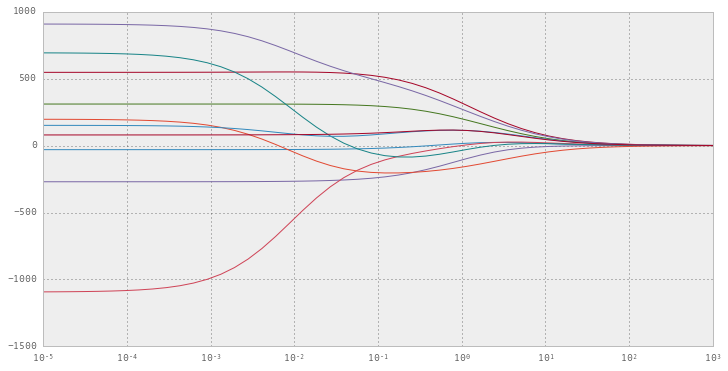

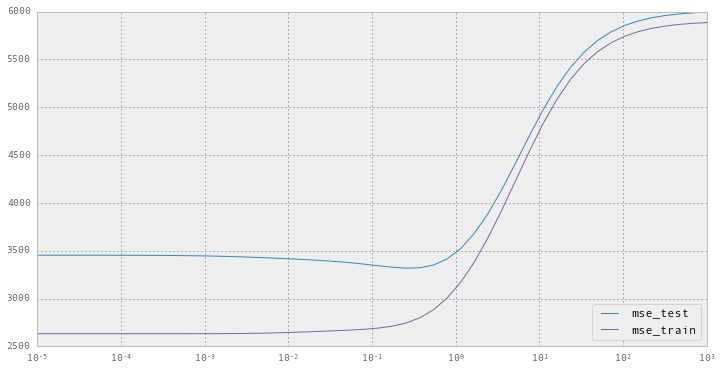

In [10]:
ridge_plot(X, y)

In [11]:

def ridge_alpha_mse_rmse_beta_plot(X, X_train, X_test, y_train):
    '''
    Return: alphas, train_MSE, test_MSE, train_RMSE, test_RMSE
    '''

    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)

    k = X.shape[1] # Feature columns qty

    alphas = np.logspace(-5, 3)

    train_MSE, test_MSE = [], []
    train_RMSE, test_RMSE = [], []

    parameters = np.zeros((len(alphas), k ))

    ridges = [Ridge(alpha= a, normalize=True).fit(X_train_scaled, y_train) for a in alphas]
    coefficients = [ridge.coef_ for ridge in ridges] # Beta coefficient

    train_MSE = [MSE(y_train, ridge.predict(X_train_scaled)) for ridge in ridges]
    test_MSE = [MSE(y_test, ridge.predict(X_test_scaled)) for ridge in ridges]

    train_RMSE = [r2_score(y_train, ridge.predict(X_train_scaled)) for ridge in ridges]
    test_RMSE = [r2_score(y_test, ridge.predict(X_test_scaled)) for ridge in ridges]
    
    # Plotting:
    fig = plt.figure(figsize=(14, 10))

    ax1 = fig.add_subplot(311)

    ax1.plot(alphas, coefficients)
    ax1.set_xlabel('alphas')
    ax1.set_ylabel('Coefficient - Betas parameters')
    ax1.set_title('Plot of coefficient values against alpha for the ridge regression model')
    ax1.set_xscale('log')
    
    ax2 = fig.add_subplot(312)

    ax2.plot(np.logspace(-2,0), train_MSE, label='Training error')
    ax2.plot(np.logspace(-2,0), test_MSE, label='Test error')
    ax2.set_xlabel('alphas')
    ax2.set_ylabel('MSE - Error')
    ax2.legend(loc='lower right')
    ax2.set_title('MSE vs alpha (Ridge regression)')
    ax2.set_xscale('log')
    
    ax3 = fig.add_subplot(313)

    ax3.plot(np.logspace(-2,0), train_RMSE, label='Training error - RMSE')
    ax3.plot(np.logspace(-2,0), test_RMSE, label='Test error - RMSE')
    ax3.set_xlabel('alphas')
    ax3.set_ylabel('RMSE - Error')
    ax3.legend(loc='lower right')
    ax3.set_title('MSE vs alpha (Ridge regression)')
    ax3.set_xscale('log')

    fig.tight_layout() 
    plt.show()
    
    return alphas, parameters, train_MSE, test_MSE, train_RMSE, test_RMSE


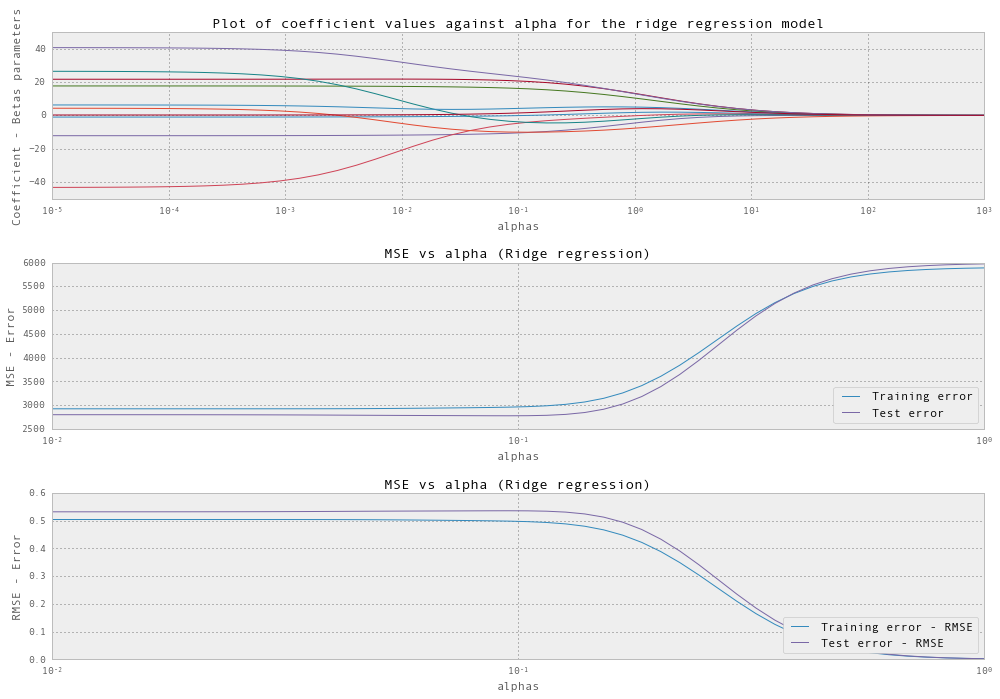

In [12]:
alfas, parameters, MSE_train, MSE_test, RMSE_train, RMSE_test = ridge_alpha_mse_rmse_beta_plot(X, X_train, X_test, y_train)

Ridge minimizes the residual sum of squares plus a shrinkage penalty of lambda multiplied by the sum of squares of the coefficients. As lambda increases, the coefficients approach zero. The coefficients are unregularized when lambda is zero. The plot shows the whole path of variables as they shrink towards zero.

The value of lambda will be chosen by cross-validation. The plot shows cross-validated mean squared error. As lambda decreases, the mean squared error decreases. Ridge includes all the variables in the model and the value of lambda selected is indicated by the vertical lines. 

** Selectin an $\alpha$ value**

In [13]:
def ridge_lambda(MSE_test, RMSE_test, alphas):
    '''
    Select best lambda to min mse and max rmse
    '''
    best_alpha = alphas[np.argmin(MSE_test)]
    min_mse_test = min(MSE_test)
    max_rmse = max(RMSE_test)
    
    return best_alpha, min_mse_test, max_rmse

In [14]:
ridge_lambda(MSE_test, RMSE_test, alfas)

(0.082864277285468427, 2778.8515246148831, 0.53596044815927246)

Setting $\alpha = 0.08 $ minimizes the MSE to 3714.8060 for Ridge Regression

In [26]:
new_alpha = 0.08
modelr_1 = Ridge(new_alpha)
modelr_1.fit(X,y) 

Ridge(alpha=0.08, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
modelr_1.score(X,y)

0.51334480588469744

In [28]:
modelr_1.coef_

array([ -2.02582581e-01,  -2.12641547e+02,   4.96761188e+02,
         3.05550717e+02,  -9.83157593e+01,  -6.29642901e+01,
        -1.85764232e+02,   1.14659154e+02,   4.56518817e+02,
         8.39573840e+01])

---
Lasso
---


** Lasso Regression:** 

In statistics and machine learning, lasso (least absolute shrinkage and selection operator) (also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. 

$ \mathbf{\hat{\beta}^{lasso} = \displaystyle arg\min_{\beta}\sum^{n}_{i=1}(y_{i}-\beta _{0}-\sum _{j=1}^{p}x_{i}^{T}\beta _{j} )^2 + \lambda\sum _{j=1}^{p}|\beta _{j}|}$


In [18]:
def lasso_alpha_mse_rmse_betavec_plot(X, X_train, X_test, y_train):

    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)

    k = X.shape[1] # Feature columns qty


    alphas = np.logspace(-5, 2)

    train_MSE, test_MSE = [], []
    train_RMSE, test_RMSE = [], []
    

    lassos = [Lasso(alpha= a, normalize=True).fit(X_train_scaled, y_train) for a in alphas]
    coefficients = [lasso.coef_ for lasso in lassos] # Beta coefficient


    train_MSE = [MSE(y_train, lasso.predict(X_train_scaled)) for lasso in lassos]
    test_MSE = [MSE(y_test, lasso.predict(X_test_scaled)) for lasso in lassos]

    train_RMSE = [r2_score(y_train, lasso.predict(X_train_scaled)) for lasso in lassos]
    test_RMSE = [r2_score(y_test, lasso.predict(X_test_scaled)) for lasso in lassos]
    

    fig = plt.figure(figsize=(14, 10))

    ax1 = fig.add_subplot(311)

    ax1.plot(alphas, coefficients)
    ax1.set_xlabel('alpha')
    ax1.set_ylabel('Coefficient - Beta parameters')
    ax1.set_title('Plot of coefficient values against alpha for the ridge regression model')
    ax1.set_xscale('log')
    
    ax2 = fig.add_subplot(312)

    ax2.plot(np.logspace(-2,0), train_MSE, label='Training error')
    ax2.plot(np.logspace(-2,0), test_MSE, label='Test error')
    ax2.set_xlabel('alpha')
    ax2.set_ylabel('MSE - Error')
    ax2.legend(loc='lower right')
    ax2.set_title('MSE vs alpha (Lasso regression)')
    ax2.set_xscale('log')
    
    ax3 = fig.add_subplot(313)

    ax3.plot(np.logspace(-2,0), train_RMSE, label='Training error - RMSE')
    ax3.plot(np.logspace(-2,0), test_RMSE, label='Test error - RMSE')
    ax3.set_xlabel('alpha')
    ax3.set_ylabel('RMSE - Error')
    ax3.legend(loc='lower right')
    ax3.set_title('MSE vs alpha (Lasso regression)')
    ax3.set_xscale('log')
    
    fig.tight_layout() 
    plt.show()
    
    return alphas, train_MSE, test_MSE, train_RMSE, test_RMSE



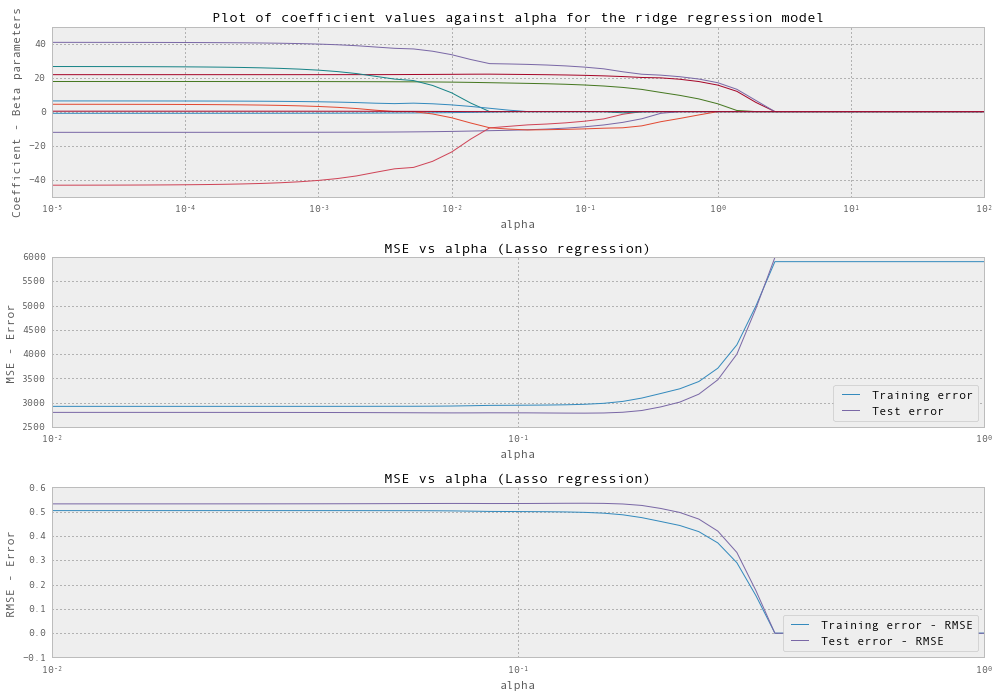

In [19]:
alfa_l, tra_MSE_l, tes_MSE_l, tra_RMSE_l, tes_RMSE_l = lasso_alpha_mse_rmse_betavec_plot(X, X_train, X_test, y_train)

Lasso minimizes the residual sum of squares plus a shrinkage penalty of lambda multiplied by the sum of absolute values of the coefficients. This model performs variable selection in that it restricts some of the coefficients to be exactly zero. The plot shows how many non-zero variables are in the model at the top.

In [20]:
def lasso_lambda(mse_test, rmse_test, alphas):
    best_lambda = alphas[np.argmin(mse_test)]
    best_mse = min(mse_test)
    max_rmse = max(rmse_test)
    
    return best_lambda, best_mse, max_rmse

In [21]:
lasso_lambda(tes_MSE_l, tes_RMSE_l, alfa_l)

(0.10000000000000001, 2786.0387054644507, 0.53476026306449886)

In [23]:
new_alpha_ = 0.1

In [24]:
model_l = Lasso(new_alpha_)
model_l.fit(X, y)
model_l.score(X, y)

0.50884007940271458

In [25]:
model_l.coef_

array([  -0.        , -155.36288234,  517.18201661,  275.08235083,
        -52.54026923,   -0.        , -210.15975349,    0.        ,
        483.91440913,   33.67282148])

**Conclusion:** Lasso give us lower MSE and a larger RMSE = R^2, therefore for this excersice Lasso is the best performance. 

The larger number of points decreases the amount of overfitting so decreases the value of regularization.


Note: Lasso and Ridge both considerably out-perfomed OLS Regression.

---